In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import numpy as np
import time
import matplotlib.pyplot as plt
import pickle

In [3]:
#store = pd.HDFStore('X_pca.h5')
#X_pca = store['X_pca']

store = pd.HDFStore('X_frac_pca.h5')
X_pca = store['X_frac_pca']

store = pd.HDFStore('X_frac_mob.h5')
X_mob = store['X_frac_mob']

store = pd.HDFStore('X_frac_month.h5')
X_month = store['X_frac_month']

store = pd.HDFStore('X_frac_year.h5')
X_year = store['X_frac_year']

store = pd.HDFStore('y_frac_default.h5')
y_default = store['y_frac_default']

store = pd.HDFStore('y_frac_prepay.h5')
y_prepay = store['y_frac_prepay']

X_pca = X_pca.join(X_mob)
X_pca = X_pca.join(X_month)
X_pca = X_pca.join(X_year)

In [3]:
X_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,mob,Orig_month,Orig_year
0,-2.223031,-0.826845,-1.879323,0.498233,-0.101536,1.098121,-0.075056,-0.063144,0.094796,0.580774,0.061946,-0.573734,-0.892856,0.598340,0.337794,7,4,2017
1,1.564894,0.152045,2.067777,-0.056015,1.445282,0.314371,-1.701214,-0.227430,0.219318,-0.598140,-1.306697,-1.477490,0.987652,-0.438319,-0.385054,8,7,2016
2,0.989821,1.699689,1.711748,1.292083,-0.794915,0.891638,-1.475140,0.125599,0.327618,-0.623276,1.002671,-0.307742,-0.303817,1.130374,-0.388383,27,12,2016
3,0.722552,0.955391,-1.466957,-0.521353,0.523259,-0.313293,-0.984075,-0.010803,0.117221,-0.747297,0.361361,-1.139176,-0.341817,-0.110366,0.035607,5,11,2016
4,-0.935804,1.849391,-0.761303,1.169290,-0.711475,-0.623119,1.658248,0.043266,-0.260523,0.593664,1.029475,-1.068507,-0.549996,0.577923,0.359996,7,4,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5190702,-2.036574,-1.609189,-0.582695,0.710118,-0.529190,-0.200150,-1.051177,0.164745,0.191225,-0.788746,1.286687,0.443004,0.420939,-0.452808,0.243450,11,8,2017
5190703,-4.202540,-0.778938,0.249663,-0.381321,0.360328,-1.268501,0.300833,0.092764,-0.160942,-0.322471,0.606523,0.029697,-1.292462,-0.093345,0.613171,9,2,2016
5190704,-4.422665,0.540038,-0.230185,-0.504343,-0.027087,1.261716,-0.492826,-0.029769,0.166200,0.408359,-0.390532,0.771287,-0.517063,0.773335,0.842312,25,5,2016
5190705,-4.168661,-0.617293,-0.353653,0.085865,0.920902,-0.587207,-1.201065,0.095533,0.065301,-0.950966,0.700228,0.287348,-0.788035,-0.828537,-0.310501,23,3,2016


In [5]:
trainX, testX, trainy, testy = train_test_split(X_pca, y_default, test_size=0.2, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.749


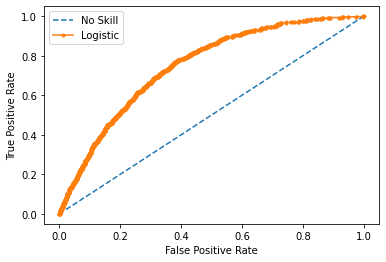

12.130876064300537 s


In [6]:
time_start = time.time()
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
time_end = time.time()

# save the model to disk
filename = 'lg_model_default.sav'
#filename = 'lg_model_date_default.sav'

pickle.dump(model, open(filename, 'wb'))
model = pickle.load(open(filename, 'rb'))
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

print (time_end - time_start, "s")

In [8]:
trainX, testX, trainy, testy = train_test_split(X_pca, y_prepay, test_size=0.2, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.622


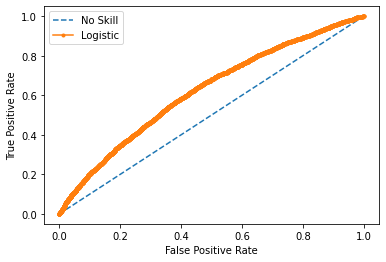

9.600492000579834 s


In [9]:
time_start = time.time()
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
time_end = time.time()

# predict probabilities
lr_probs = model.predict_proba(testX)

# keep probabilities for the positive outcome only

filename = 'lg_model_prepay.sav'
#filename = 'lg_model_date_prepay.sav'

pickle.dump(model, open(filename, 'wb'))
model = pickle.load(open(filename, 'rb'))
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

print (time_end - time_start, "s")